In [3]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchmetrics
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping


data = loadmat("data/monkeydata.mat")['trial']

spike, pos, y = [], [], []

for trials in data:
    for target, trial in enumerate(trials):
        spike.append(trial[1])
        pos.append(trial[2])
        y.append(target)

In [6]:
pos[0].shape

(3, 672)

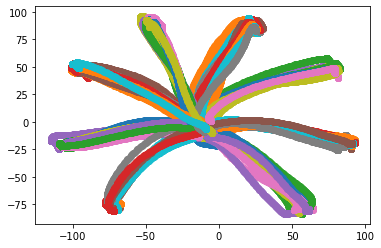

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(100):
    plt.scatter(pos[i][0, :], pos[i][1, :])

plt.show()

In [17]:
import numpy as np

def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

p1 = [0, 0]
p2 = [pos[0][0, -1], pos[0][1, -1]]
angle_between(p1, p2)

329.09159608028904

In [27]:
angle_between((0, 1), (1, 1))

45.0

In [26]:
angle_between((0, 1), (1, 0))

90.0

In [29]:
angle_between((0, 1), (-1, -1))

225.0

In [28]:
angle_between((0, 1), (-1, 0))

270.0

In [32]:
import math

for i in range(8):
    p1 = (0, 1)
    p2 = [pos[i][0, -1], pos[i][1, -1]]
    
    print(angle_between(p1, p2))

59.091596080289044
16.546007645496474
333.68935737438613
296.419270484818
257.1481894113978
224.13137702502388
141.2941655780882
101.08278058282205
